Research Hypothesis: 

Does how the functionnal neural connectivity between the schizophrenic patients is different than normal population?

In [330]:
import os
import networkx as nx
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import networkx as nx
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# # Step 1: Preprocess the Data

In [331]:
os.chdir(r"C:\Users\rezan\OneDrive\Documents\Horizon To Reach\microlabs X\neurolabs X\NeuroLab X\Train")

In [332]:
data = pd.read_csv("train_FNC.csv")

In [333]:
print("The number of the funnctional neural connectivity nodes is", data.shape[1])

The number of the funnctional neural connectivity nodes is 379


In [334]:
print(" The number of the observation in the cohort is",data.shape[0])

 The number of the observation in the cohort is 86


In [335]:
print(data.head(1))

       Id     FNC1      FNC2     FNC3     FNC4     FNC5     FNC6      FNC7  \
0  120873  0.34312  0.045761 -0.13112  0.15034  0.18082  0.28916  0.069545   

       FNC8   FNC9  ...   FNC369   FNC370   FNC371    FNC372  FNC373   FNC374  \
0 -0.052489  0.124  ...  0.18743  0.16377  0.17686  0.074728  0.1486  0.34323   

    FNC375   FNC376    FNC377   FNC378  
0  0.17565  0.52035  0.030613  0.30774  

[1 rows x 379 columns]


In [336]:
labels = pd.read_csv("train_labels.csv")

In [337]:
data_labelled = pd.merge(data,labels, on = "Id")

In [338]:
data_labelled.head(1)  # 1 denotes schizophrenic and 0 denotes healthy 

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.28916,0.069545,-0.052489,0.124,...,0.16377,0.17686,0.074728,0.1486,0.34323,0.17565,0.52035,0.030613,0.30774,1


In [339]:
# Separate the data into two classes based on the label column

data_0 = data_labelled[data_labelled['Class'] == 0]
data_1 = data_labelled[data_labelled['Class'] == 1]

# Display the first few rows of each class
print("Class 0:")
data_0.head(1)

print("Class 1:")
data_1.head(1)


Class 0:
Class 1:


,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.28916,0.069545,-0.052489,0.124,...,0.16377,0.17686,0.074728,0.1486,0.34323,0.17565,0.52035,0.030613,0.30774,1


In [340]:
data_0.shape , data_1.shape

((46, 380), (40, 380))

In [341]:
data_schizo = pd.DataFrame(data_1.drop(columns=["Class"]))
data_healthy = pd.DataFrame(data_0.drop(columns=["Class"]))

In [342]:
type(data_schizo)

pandas.core.frame.DataFrame

In [343]:
data_schizo.shape,data_healthy.shape

((40, 379), (46, 379))

In [344]:
data_schizo.head(1)

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.28916,0.069545,-0.052489,0.124,...,0.18743,0.16377,0.17686,0.074728,0.1486,0.34323,0.17565,0.52035,0.030613,0.30774


In [345]:
# Normalize the data
data_1_normalized = (data_1 - data_1.mean()) / data_1.std()

In [346]:
data_1_normalized.head(1)

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class
0,-1.480583,0.515227,-0.088375,-0.163703,0.644452,0.282752,0.931301,0.553243,-0.256854,-0.115437,...,-0.083904,-0.510099,-0.254655,0.581664,0.458376,-1.413556,0.632807,0.798098,0.53144,NaN


In [347]:
data_0_normalized = (data_0 - data_0.mean())/data_0.std()

In [348]:
data_0_normalized.head(1)

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class
1,-1.525528,0.285572,0.26566,-0.679794,-0.231546,-0.318108,1.057013,0.145878,0.030916,-0.503235,...,-1.982224,0.073802,1.415476,0.440838,1.4589,0.460125,0.421476,0.288959,1.631335,NaN


In [349]:
data_0_normalized = (data_0.drop(columns=['Id', 'Class']) - data_0.drop(columns=['Id', 'Class']).mean()) / data_0.drop(columns=['Id', 'Class']).std()
data_1_normalized = (data_1.drop(columns=['Id', 'Class']) - data_1.drop(columns=['Id', 'Class']).mean()) / data_1.drop(columns=['Id', 'Class']).std()

In [350]:
sum(data_0_normalized.isna().sum())

0

# # Step 2: Define the Graph Structure for the healthy population

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


In [23]:
# Assuming 'df' is your DataFrame containing FNC data
X_Healthy = data_0.drop(columns=['Id', 'Class']).values # Extract features excluding 'Id' column
X_Schizo = data_1.drop(columns=["Id","Class"]).values

# Standardize features (optional but recommended for neural networks)
scaler = StandardScaler()
X_Healthy_scaled = scaler.fit_transform(X_Healthy)
X_Schizo_scaled = scaler.fit_transform(X_Schizo)

In [164]:
X_Healthy.shape[1]

378

# Step 3: Building the "Graph Neural Network"

Define your GNN model architecture using Keras functional API. In this case, you'll design an encoder-decoder architecture that encourages the model to learn node embeddings that capture the graph structure for clustering.

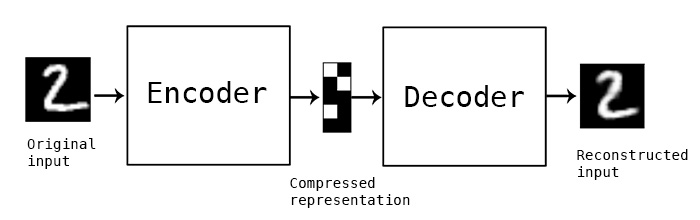![image.png]

In [24]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# MODEL A:

In [25]:
# Define input layer
input_layer = Input(shape=(X_Healthy_scaled.shape[1],))

# Encoder layers
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(32, activation='relu')(encoder)

# Latent space representation (embedding)
latent_space = Dense(16, activation='relu')(encoder)

# Decoder layers
decoder = Dense(32, activation='relu')(latent_space)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64, activation='relu')(decoder)

# Output layer for reconstruction
output_layer = Dense(X_Healthy_scaled.shape[1], activation='linear')(decoder)

# Create model
model_Healthy_A = Model(inputs=input_layer, outputs=output_layer)

# Compile model with Adam optimizer and learning rate specified correctly
optimizer = Adam(learning_rate=0.001)  # Specify learning rate here
model_Healthy_A.compile(optimizer=optimizer, loss='mse')  # Use mean squared error for reconstruction loss


# Step 4: Train the GNN model:

In [26]:

history_Healthy_A = model_Healthy_A.fit(X_Healthy_scaled, X_Healthy_scaled, epochs=50, batch_size=32)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0358
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0042 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0190 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0171 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0184 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9853 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9914 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9891 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9823 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9802 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9830 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0053 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9734 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9715 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9595  
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

# Step 5: Extract node embeddings for clustering

After training, extract the embeddings (latent space representation) from the encoder part of the model. These embeddings can then be used for clustering nodes.

In [27]:


# Define a Keras model to extract embeddings of the latent space 
extractor_Healthy_A = tf.keras.Model(inputs=model_Healthy_A.input, outputs=model_Healthy_A.layers[3].output)  

# Extract embeddings
embeddings_Healthy_A = extractor_Healthy_A.predict(X_Healthy_scaled)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


# Step 6: Perform clustering on Model A

# Applying Agglomerative Hierarchical Clustering

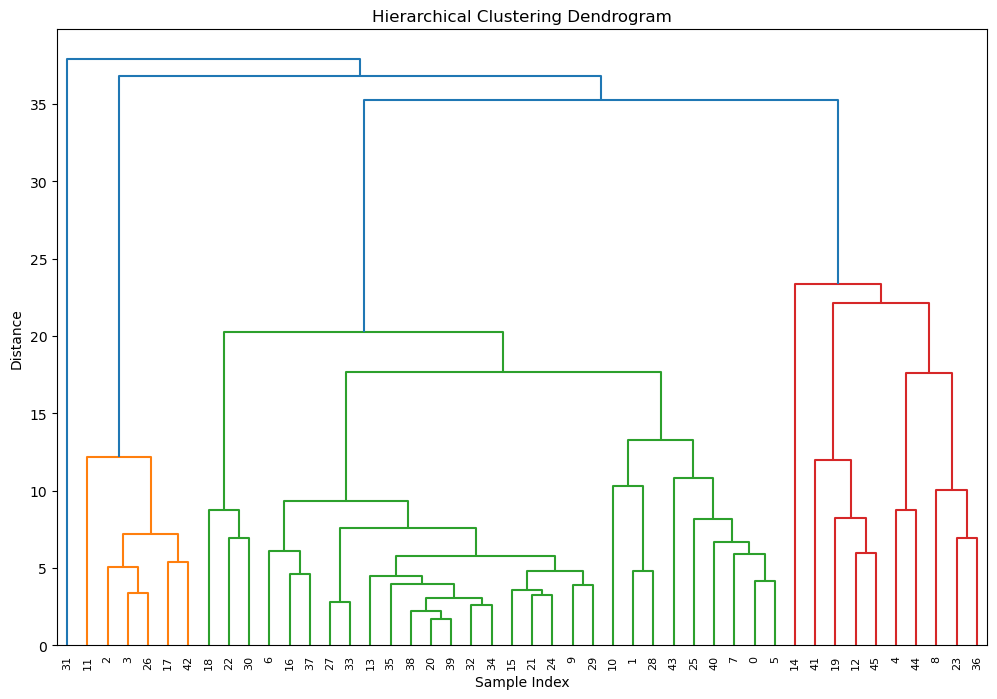

Number of clusters: 46


In [30]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Agglomerative Hierarchical Clustering
# Adjust parameters as needed (e.g., linkage, number of clusters)
agg_clustering_Healthy_A = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
cluster_labels_Healthy_A = agg_clustering_Healthy_A.fit_predict(embeddings_Healthy_A)

# Plotting the Dendrogram (Optional, for visualization)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(embeddings_Healthy_A, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# Determine the number of clusters
num_clusters_Healthy_A = len(set(cluster_labels_Healthy_A))
print(f"Number of clusters: {num_clusters_Healthy_A}")


C:\Users\rezan\AppData\Local\Temp\ipykernel_12148\106993405.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d_Healthy_A[:, 0], embeddings_2d_Healthy_A[:, 1], s=10, cmap='viridis')


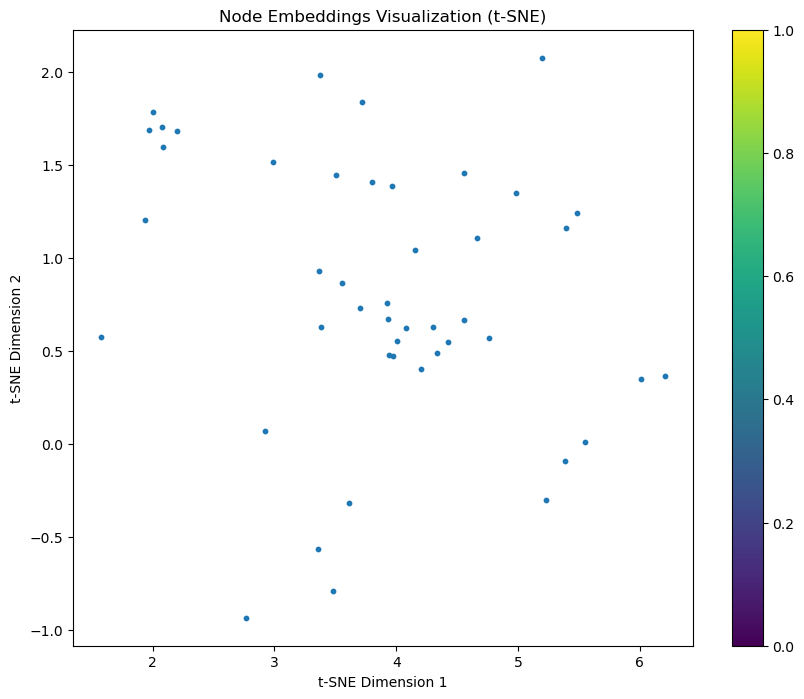

In [32]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Reduce dimensions to 2D using t-SNE
tsne_Healthy_A = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d_Healthy_A = tsne_Healthy_A.fit_transform(embeddings_Healthy_A)

# Plotting the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d_Healthy_A[:, 0], embeddings_2d_Healthy_A[:, 1], s=10, cmap='viridis')
plt.title('Node Embeddings Visualization (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


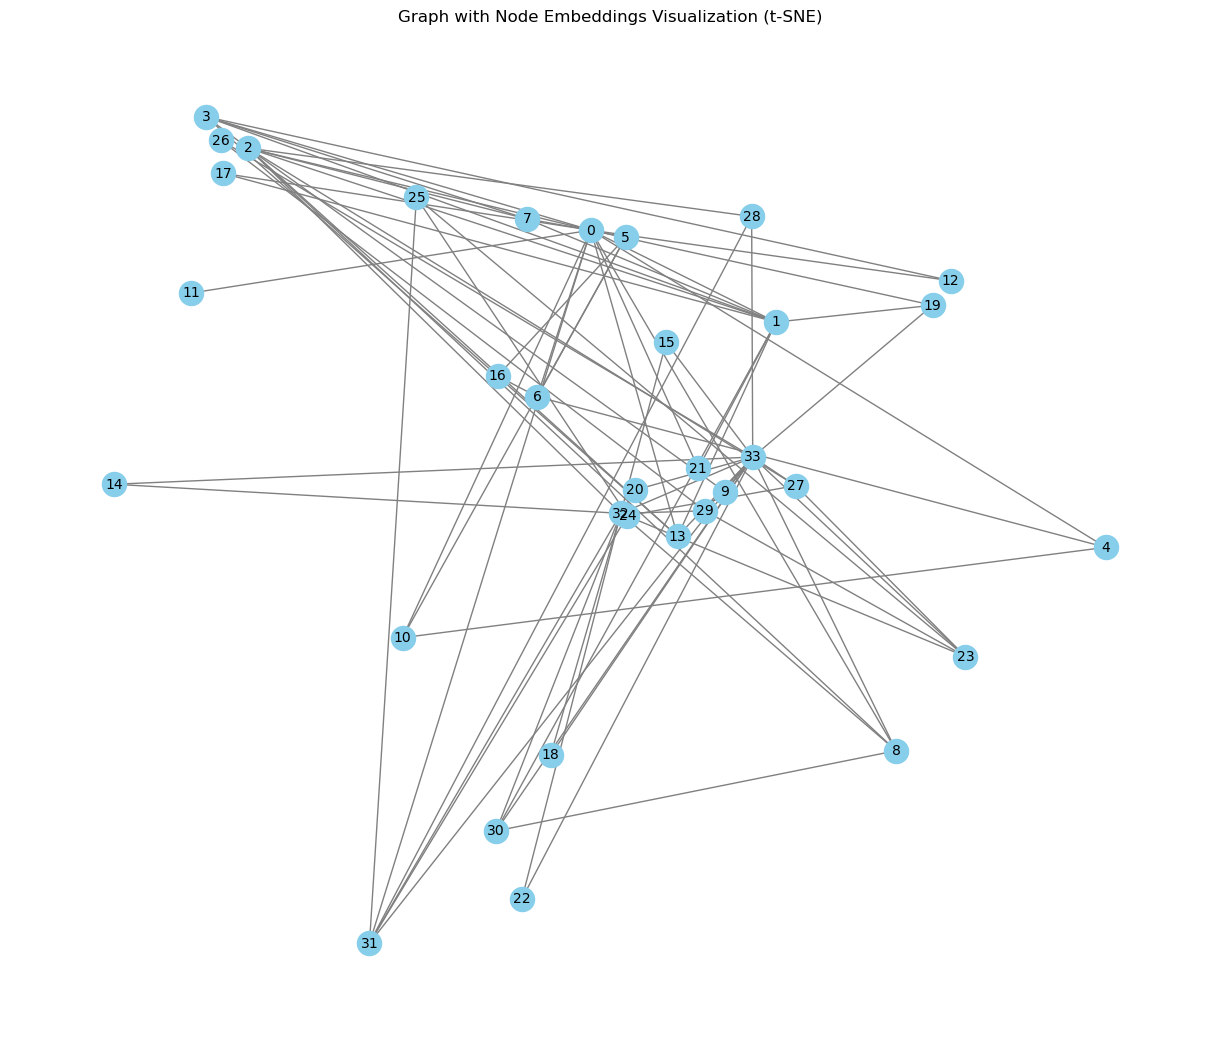

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Create a sample graph (replace with your actual graph if available)
G = nx.karate_club_graph()

# Reduce dimensions to 2D using t-SNE for node positions
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_Healthy_A)

# Draw the graph with node positions based on embeddings
plt.figure(figsize=(12, 10))
nx.draw(G, pos=dict(zip(G.nodes(), embeddings_2d)), with_labels=True, node_color='skyblue', node_size=300, edge_color='grey', linewidths=1, font_size=10)
plt.title('Graph with Node Embeddings Visualization (t-SNE)')
plt.show()

In [ ]:
# Assuming each node has a 'club' attribute ('Mr. Hi' or 'Officer')
color_map = {'Mr. Hi': 'skyblue', 'Officer': 'salmon'}
node_colors = [color_map[G.nodes[node]['club']] for node in G.nodes]

plt.figure(figsize=(12, 10))
nx.draw(G, pos=dict(zip(G.nodes(), embeddings_2d)), with_labels=True, node_color=node_colors, node_size=300, edge_color='grey', linewidths=1, font_size=10)
plt.title('Graph with Node Embeddings Visualization (t-SNE) - Colored by Club')
plt.show()


In [ ]:
# Example of computing degree centrality
degree_centrality = nx.degree_centrality(G)

# Plotting degree centrality
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Graph with Degree Centrality')
plt.show()


# MODEL B for HEALTHY 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - loss: 1.0047 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.0129 - val_loss: 1.0060 - learning_rate: 0.0010
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9826 - val_loss: 1.0061 - learning_rate: 0.0010
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.0083 - val_loss: 1.0062 - learning_rate: 0.0010
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.0004 - val_loss: 1.0066 - learning_rate: 0.0010
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9721 - val_loss: 1.0068 - learning_rate: 0.0010
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.0056 - val_loss: 1.0070 - learning_rate: 0.0010
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.9931 - val_loss: 1.0072 - learning_rate: 5.0000e-04
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.0004 - val_loss: 1.0074 - learning_rate: 5.0000e-04
Epoch 10/100
2/2 ━━

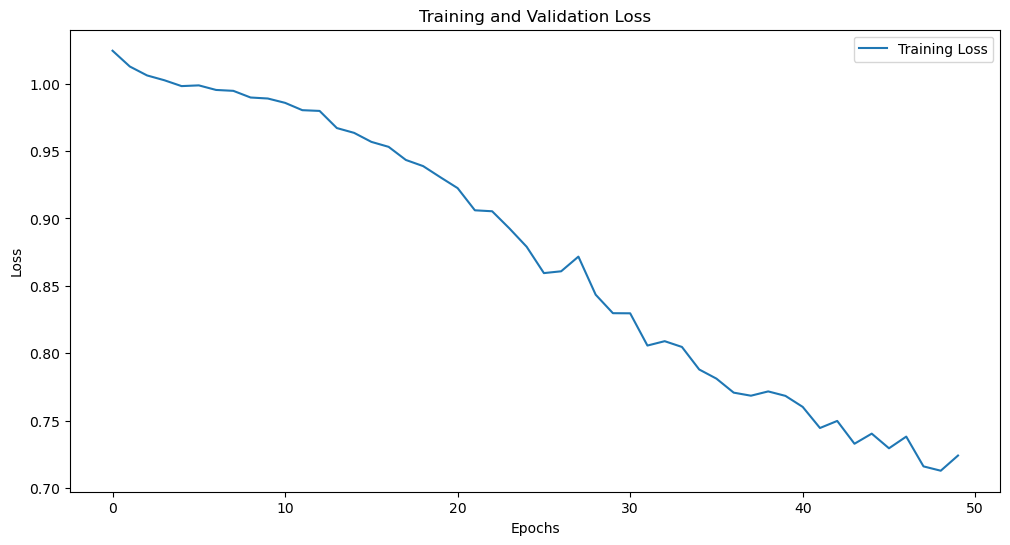

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define input layer
input_layer = Input(shape=(X_Healthy_scaled.shape[1],))

# Encoder layers
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(32, activation='relu')(encoder)

# Latent space representation (embedding)
latent_space = Dense(16, activation='relu')(encoder)

# Decoder layers
decoder = Dense(32, activation='relu')(latent_space)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64, activation='relu')(decoder)

# Output layer for reconstruction
output_layer = Dense(X_Healthy_scaled.shape[1], activation='linear')(decoder)

# Create model
model_Healthy_B = Model(inputs=input_layer, outputs=output_layer)

# Compile model with RMSprop optimizer and learning rate scheduler
optimizer = RMSprop(learning_rate=0.001)
model_Healthy_B.compile(optimizer=optimizer, loss='mse')  # Use mean squared error for reconstruction loss

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with validation split
history_Healthy_B  = model_Healthy_B.fit(X_Healthy_scaled, X_Healthy_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_Healthy_A.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [38]:
import tensorflow as tf

# Define a Keras model to extract embeddings
extractor_Healthy_B = tf.keras.Model(inputs=model_Healthy_B.input, outputs=model_Healthy_B.layers[3].output)  # Adjust layer index based on your model architecture

# Extract embeddings
embeddings_Healthy_B = extractor_Healthy_B.predict(X_Healthy_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


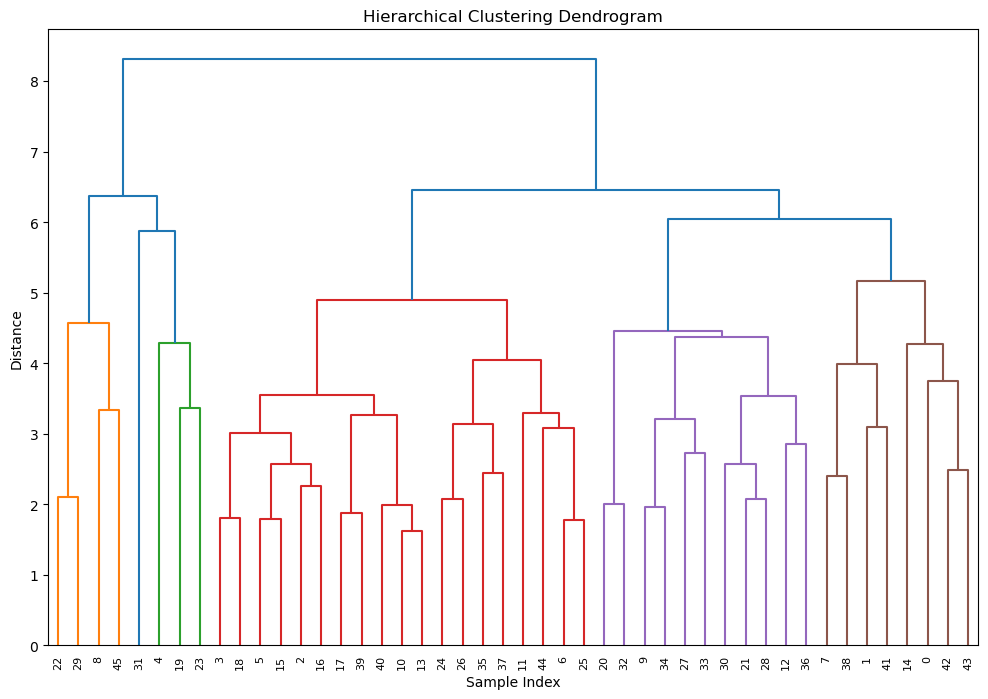

Number of clusters: 46


In [39]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Agglomerative Hierarchical Clustering
# Adjust parameters as needed (e.g., linkage, number of clusters)
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
cluster_labels = agg_clustering.fit_predict(embeddings_Healthy_B)

# Plotting the Dendrogram (Optional, for visualization)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(embeddings_Healthy_B, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# Determine the number of clusters
num_clusters = len(set(cluster_labels))
print(f"Number of clusters: {num_clusters}")

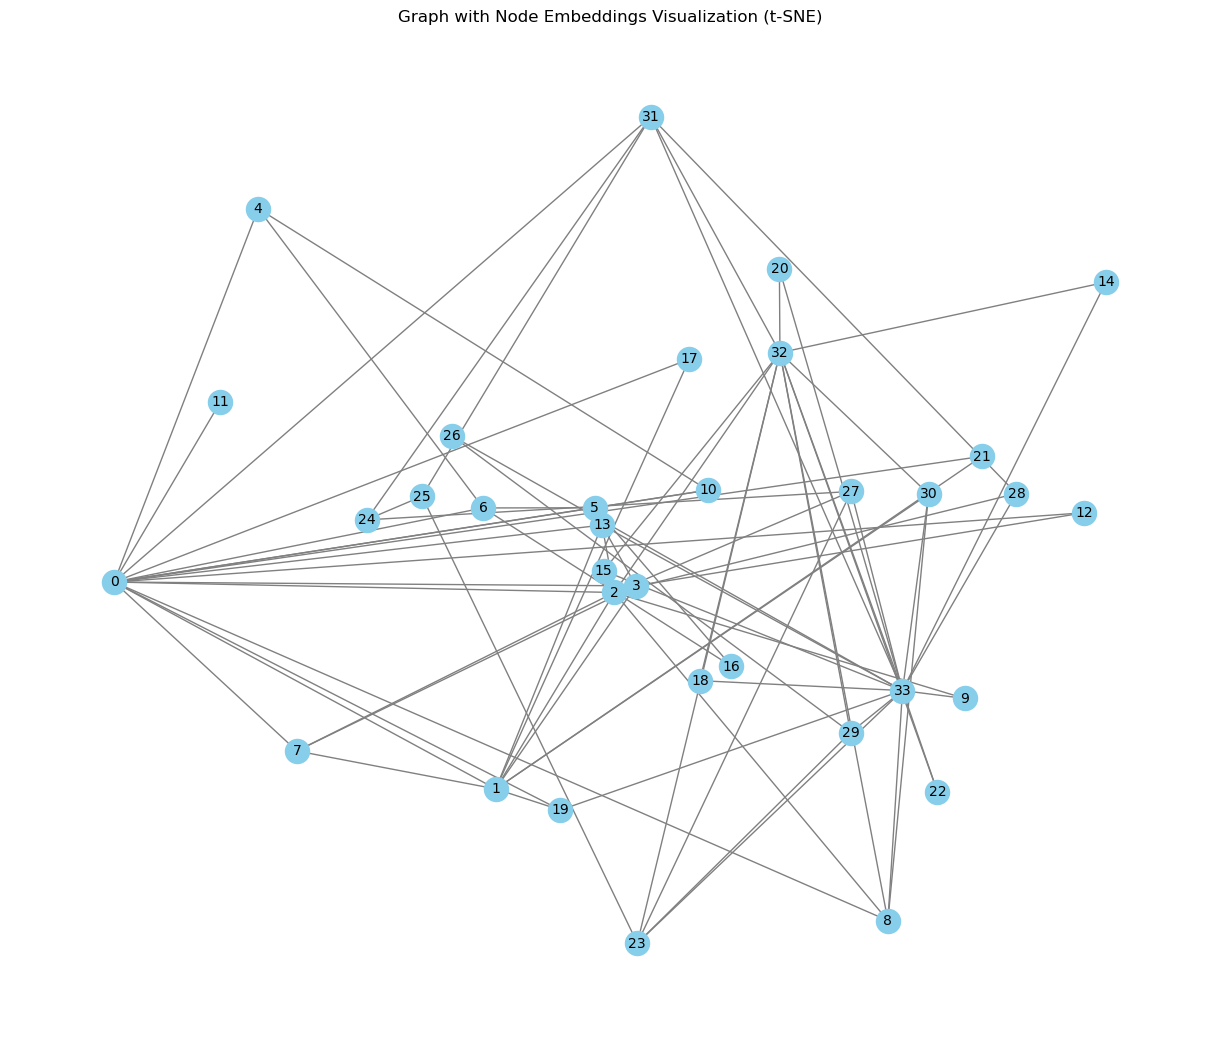

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Create a sample graph (replace with your actual graph if available)
G = nx.karate_club_graph()

# Reduce dimensions to 2D using t-SNE for node positions
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d_Healthy_B = tsne.fit_transform(embeddings_Healthy_B)

# Draw the graph with node positions based on embeddings
plt.figure(figsize=(12, 10))
nx.draw(G, pos=dict(zip(G.nodes(), embeddings_2d_Healthy_B)), with_labels=True, node_color='skyblue', node_size=300, edge_color='grey', linewidths=1, font_size=10)
plt.title('Graph with Node Embeddings Visualization (t-SNE)')
plt.show()

# The Scizophrenic Datasets 

In [41]:
# Define input layer
input_layer = Input(shape=(X_Schizo_scaled.shape[1],))

# Encoder layers
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(32, activation='relu')(encoder)

# Latent space representation (embedding)
latent_space = Dense(16, activation='relu')(encoder)

# Decoder layers
decoder = Dense(32, activation='relu')(latent_space)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64, activation='relu')(decoder)

# Output layer for reconstruction
output_layer = Dense(X_Healthy_scaled.shape[1], activation='linear')(decoder)

# Create model
model_Schizo_A = Model(inputs=input_layer, outputs=output_layer)

# Compile model with Adam optimizer and learning rate specified correctly
optimizer = Adam(learning_rate=0.001)  # Specify learning rate here
model_Schizo_A.compile(optimizer=optimizer, loss='mse')  # Use mean squared error for reconstruction loss


In [42]:

history_Schizo_A = model_Schizo_A.fit(X_Schizo_scaled, X_Schizo_scaled, epochs=50, batch_size=32)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 1.0375
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0225
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0299 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9853
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9944 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0014 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9949
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0046 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0029 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0023
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0004  
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9979 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9951 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9797 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9893 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━

In [43]:
import tensorflow as tf

# Define a Keras model to extract embeddings
extractor_Schizo_A = tf.keras.Model(inputs=model_Schizo_A.input, outputs=model_Schizo_A.layers[3].output) 

# Extract embeddings
embeddings_Schizo_A = extractor_Schizo_A.predict(X_Healthy_scaled)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020A27C4DC60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


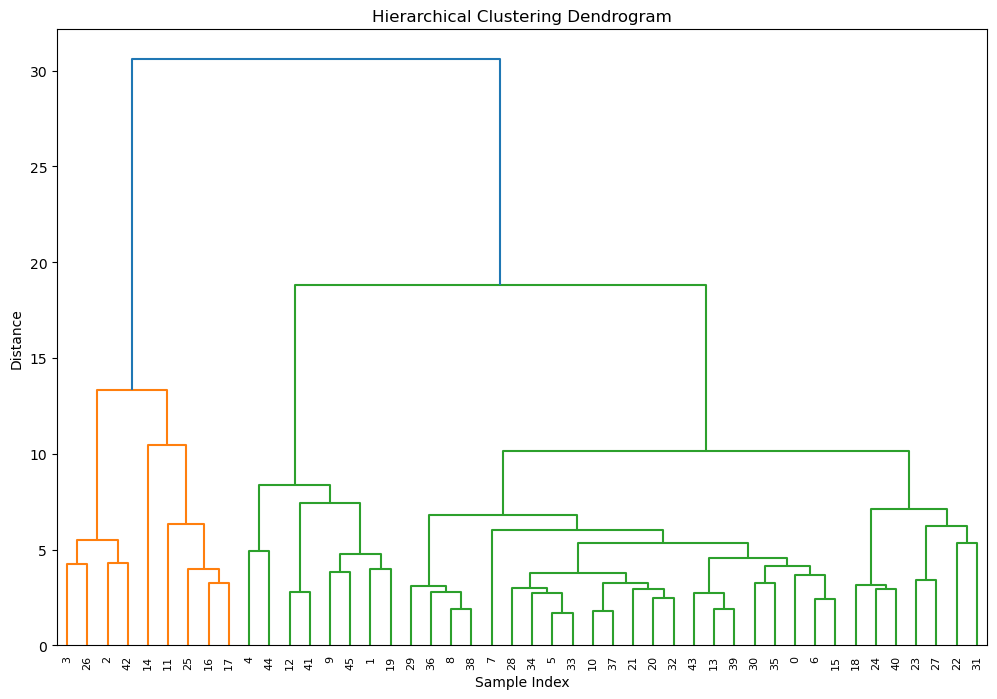

Number of clusters: 46


In [44]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


# Apply Agglomerative Hierarchical Clustering
# Adjust parameters as needed (e.g., linkage, number of clusters)
agg_clustering_Schizo_A = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
cluster_labels_Schizo_A = agg_clustering_Schizo_A.fit_predict(embeddings_Schizo_A)

# Plotting the Dendrogram (Optional, for visualization)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(embeddings_Schizo_A, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# Determine the number of clusters
num_clusters_Schizo_A = len(set(cluster_labels_Schizo_A))
print(f"Number of clusters: {num_clusters_Schizo_A}")


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_Schizo_A)

# Plotting the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, cmap='viridis')
plt.title('Node Embeddings Visualization (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Create a sample graph (replace with your actual graph if available)
G = nx.karate_club_graph()

# Reduce dimensions to 2D using t-SNE for node positions
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d_Schizo_A = tsne.fit_transform(embeddings_Schizo_A)

# Draw the graph with node positions based on embeddings
plt.figure(figsize=(12, 10))
nx.draw(G, pos=dict(zip(G.nodes(), embeddings_2d_Schizo_A)), with_labels=True, node_color='skyblue', node_size=300, edge_color='grey', linewidths=1, font_size=10)
plt.title('Graph with Node Embeddings Visualization (t-SNE)')
plt.show()

# Model B : Schizophrenic Patients 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define input layer
input_layer = Input(shape=(X_Schizo_scaled.shape[1],))

# Encoder layers
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(32, activation='relu')(encoder)

# Latent space representation (embedding)
latent_space = Dense(16, activation='relu')(encoder)

# Decoder layers
decoder = Dense(32, activation='relu')(latent_space)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64, activation='relu')(decoder)

# Output layer for reconstruction
output_layer = Dense(X_Schizo_scaled.shape[1], activation='linear')(decoder)

# Create model
model_Schizo_B = Model(inputs=input_layer, outputs=output_layer)

# Compile model with RMSprop optimizer and learning rate scheduler
optimizer = RMSprop(learning_rate=0.001)
model_Schizo_B.compile(optimizer=optimizer, loss='mse')  # Use mean squared error for reconstruction loss

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with validation split
history_Schizo_B  = model_Schizo_B.fit(X_Schizo_scaled, X_Schizo_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_Schizo_B.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

# Define a Keras model to extract embeddings
extractor_Schizo_B = tf.keras.Model(inputs=model_Schizo_B.input, outputs=model_Schizo_B.layers[3].output) 

# Extract embeddings
embeddings_Schizo_B = extractor_Schizo_B.predict(X_Schizo_scaled)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


# Apply Agglomerative Hierarchical Clustering
# Adjust parameters as needed (e.g., linkage, number of clusters)
agg_clustering_Schizo_B = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
cluster_labels_Schizo_B= agg_clustering_Schizo_B.fit_predict(embeddings_Schizo_A)

# Plotting the Dendrogram (Optional, for visualization)
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(embeddings_Schizo_B, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# Determine the number of clusters
num_clusters_Schizo_B = len(set(cluster_labels_Schizo_B))
print(f"Number of clusters: {num_clusters_Schizo_B}")


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Reduce dimensions to 2D using t-SNE
tsne_Schizo_B = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d_Schizo_B = tsne_Schizo_B.fit_transform(embeddings_Schizo_A)

# Plotting the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, cmap='viridis')
plt.title('Node Embeddings Visualization (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'embeddings' is a numpy array of shape (num_nodes, embedding_dim)
# Replace this with your actual embeddings obtained from your GNN model

# Create a sample graph (replace with your actual graph if available)
G = nx.karate_club_graph()

# Reduce dimensions to 2D using t-SNE for node positions
tsne_Schizo_B = TSNE(n_components=2, perplexity=30.0, random_state=42)
embeddings_2d_Schizo_B = tsne_Schizo_B.fit_transform(embeddings_Schizo_A)

# Draw the graph with node positions based on embeddings
plt.figure(figsize=(12, 10))
nx.draw(G, pos=dict(zip(G.nodes(), embeddings_2d_Schizo_A)), with_labels=True, node_color='skyblue', node_size=300, edge_color='grey', linewidths=1, font_size=10)
plt.title('Graph with Node Embeddings Visualization (t-SNE)')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'G' is your graph (constructed using NetworkX)
degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.hist(degree_values, bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'G' is your graph with weighted edges
weights = [G[u][v]['weight'] for u, v in G.edges()]
pos = nx.spring_layout(G)  # Layout for visualization

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color=weights, edge_cmap=plt.cm.Blues)
plt.title('Graph with Edge Weight Visualization')
plt.show()


In [ ]:
# Example of computing degree centrality
degree_centrality = nx.degree_centrality(G)

# Plotting degree centrality
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=[v * 1000 for v in degree_centrality.values()])
plt.title('Graph with Degree Centrality')
plt.show()


In the above , Nodes with higher centrality scores are more influential or centrally located within the graph structure

# Model & Connectivity Comparison 

# Latent Space Analysis (t-SNE Visualization)


In [ ]:
from sklearn.manifold import TSNE

# Obtain latent representations from both models
latent_healthy_A = model_Healthy_A.get_layer('dense_49').output
latent_schizo_B = model_Schizo_B.get_layer('dense_79').output

# Create models to extract latent representations
encoder_healthy_A = Model(inputs=model_Healthy_A.input, outputs=latent_healthy_A)
encoder_schizo_B = Model(inputs=model_Schizo_B.input, outputs=latent_schizo_B)

# Get latent representations for test data
latent_representations_healthy_A = encoder_healthy_A.predict(X_Healthy_scaled)
latent_representations_schizo_B = encoder_schizo_B.predict(X_Schizo_scaled)

# Reduce dimensions to 2D using t-SNE for both models
tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)

latent_tsne_healthy_A = tsne.fit_transform(latent_representations_healthy_A)
latent_tsne_schizo_B = tsne.fit_transform(latent_representations_schizo_B)

# Plot t-SNE visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(latent_tsne_healthy_A[:, 0], latent_tsne_healthy_A[:, 1],  cmap='viridis')
plt.title('t-SNE of Latent Space (Model A)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latent_tsne_schizo_B[:, 0], latent_tsne_schizo_B[:, 1],  cmap='viridis')
plt.title('t-SNE of Latent Space (Model B)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()

plt.tight_layout()
plt.show()


# Variational Deep Autoencoder 

# Step 1: Import the dependancies 

In [46]:
import numpy as np # for the numerical manipulations and calculations 
import pandas as pd # For the dataframes manipulation 
import tensorflow as tf # The framework for deep learning 
from tensorflow.keras.layers import Input, Dense, Lambda # Input , Dense & Lambda for the stacking of the layers in the deep learning framework 
from tensorflow.keras.models import Model # for specification of the model  
from tensorflow.keras.losses import mse # The reconstruction loss as 'Mean Sqaured Error" 
from tensorflow.keras import backend as K # for the deep learning architecture probabilistic manipulation and cusome codes 

# Step 2: Define the VAE model parameters

In [207]:
input_dim = X_Healthy_scaled.shape[1]

In [208]:
latent_dim = 2 # This specifies the dimension of the bottleneck of the VAE . The VAE learns to represents each input as a point into 2D

In [209]:
intermediate_dim = 64 # This represents the number of the neurons in both the encoder and decoder layers of the VAE

# Step 3:  Encoder model

In [210]:
inputs = Input(shape = (input_dim,),name = "encoder_input") # This is feeding layer of features of 378 FNC 

In [211]:
inputs

<KerasTensor shape=(None, 378), dtype=float32, sparse=None, name=encoder_input>

In [212]:
x = Dense(intermediate_dim,activation = "relu")(inputs)

In [213]:
z_mean = Dense(latent_dim,name = "z_mean")(x) # This defines the mean of the latent variables , the input trapped in the latent space 

In [214]:
z_log_var = Dense(latent_dim,name = "z_log_var")(x) # This defines the logarithm of variance of the latent variables .

In [215]:
def sampling(args):
    z_mean, z_log_var = args   # This receives the tuple that contains both the "mean" and " log_variance" for the latent space distribution 
    batch = K.shape(z_mean)[0] # This defines the size of the batch as the size of the samples 
    dim = K.int_shape(z_mean)[1] # This defines the dimension of the latent space 
    epsilon = K.random_normal(shape=(batch, dim)) # This defines the generation of the random noise as normal distribution 
    return z_mean + K.exp(0.5 * z_log_var) * epsilon # This defines the "reparametrization trick" and inducing the diffrentiable stochasticity 

# Step 4: Integrating the Sampling Function into the VAE

In [216]:
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var]) # This creates a layer that applies the sampling to the output of encoder
# The resulting z represents samples from the latent space distribution and can be fed into the decoder to reconstruct the input data.

# Step 5: Instantiate encoder model

In [217]:
encoder = Model(inputs,[z_mean,z_log_var,z],name = "encoder")

In [218]:
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 378)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 64)        │     24,256 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        130 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        130 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,516 (95.77 KB)

 Trainable params: 24,516 (95.77 KB)

 Non-trainable params: 0 (0.00 B)

# Step 6: Decoder model

In [219]:
latent_inputs = Input(shape = (latent_dim,) , name = "z_sampling") # This defines the input from the latent space into the decoder

In [220]:
x = Dense(intermediate_dim,activation = "relu")(latent_inputs)

In [221]:
outputs = Dense(input_dim,activation = "sigmoid")(x)

# Step 7: Instantiate decoder model

In [222]:
decoder = Model(latent_inputs,outputs,name = "decoder")

In [223]:
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 378)            │        24,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,762 (96.73 KB)

 Trainable params: 24,762 (96.73 KB)

 Non-trainable params: 0 (0.00 B)

# Step 8: Instantiate VAE model

In [224]:
outputs = decoder(encoder(inputs)[2]) # This deoced the extracted 3rd element from the encoder output which is latent variable z 

In [225]:
vae = Model(inputs,outputs,name = "vae_mlp")

# Step 9 : Define the VAE loss 

In [226]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class ReconstructionLossLayer(Layer):
    def __init__(self, **kwargs):
        super(ReconstructionLossLayer, self).__init__(**kwargs)

    def call(self, inputs, outputs):
        return K.mean(K.square(inputs - outputs), axis=-1)

class KLDivergenceLayer(Layer):
    def __init__(self, **kwargs):
        super(KLDivergenceLayer, self).__init__(**kwargs)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        return kl_loss


# STEP 10 : Instantiate the custom loss layers

In [227]:
reconstruction_loss_layer = ReconstructionLossLayer()
kl_divergence_layer = KLDivergenceLayer()

In [228]:
# STEP 11 : Calculate the loss 

In [194]:
reconstruction_loss = reconstruction_loss_layer(inputs, outputs)
kl_loss = kl_divergence_layer([z_mean, z_log_var])

In [195]:
# STEP 11: Combine the loss

In [235]:
def vae_loss(inputs, outputs):
    reconstruction_loss = binary_crossentropy(inputs, outputs) * input_dim
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)

# Compile the VAE model
vae.compile(optimizer='adam', loss=vae_loss)

# Alternative VAE 

# Encoder 

In [230]:
inputs = Input(shape = (input_dim,))

In [231]:
h = Dense(intermediate_dim,activation = "relu")(inputs)

In [233]:
z_mean = Dense(latent_dim)(h

In [234]:
z_log_var = Dense(latent_dim)(h)

# Sampling 

In [236]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder 

In [237]:
decoder_h = Dense(intermediate_dim,activation = "relu")

In [238]:
decoder_mean = Dense(input_dim,activation = "sigmoid")

In [242]:
h_decoded = decoder_h(z)

In [243]:
x_decoded_mean =decoder_mean(h_decoded)

# VAE model

In [244]:
vae = Model(inputs,x_decoded_mean)

In [246]:
# Loss 

In [264]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import pandas as pd

class ReconstructionLossLayer(Layer):
    def call(self, inputs, outputs):
        return K.mean(K.square(inputs - outputs), axis=-1)

class KLDivergenceLayer(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        return kl_loss

In [265]:
def vae_loss(inputs, x_decoded_mean):
    reconstruction_loss = K.mean(K.square(inputs - x_decoded_mean), axis=-1)
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

In [266]:
vae.compile(optimizer='adam', loss=vae_loss)

In [267]:
vae.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 378)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │     24,256 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 2)         │        130 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 2)         │        130 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_6 (Lambda)   │ (None, 2)         │          0 │ dense_67[0][0],   │
│                     │                   │            │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 64)        │        192 │ lambda_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 378)       │     24,570 │ dense_69[1][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 49,278 (192.49 KB)

 Trainable params: 49,278 (192.49 KB)

 Non-trainable params: 0 (0.00 B)

In [269]:
vae.fit(X_Healthy_scaled,X_Healthy_scaled, epochs=50, batch_size=32)

Epoch 1/50


ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [270]:
class ReconstructionLossLayer(Layer):
    def __init__(self, **kwargs):
        super(ReconstructionLossLayer, self).__init__(**kwargs)

    def call(self, inputs, outputs):
        return K.mean(K.square(inputs - outputs), axis=-1)

class KLDivergenceLayer(Layer):
    def __init__(self, **kwargs):
        super(KLDivergenceLayer, self).__init__(**kwargs)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        return kl_loss

In [271]:
# Define custom loss function
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = K.mean(K.square(inputs - outputs), axis=-1)
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

In [279]:
# Add the custom loss to the model
reconstruction_loss_layer = ReconstructionLossLayer()
kl_divergence_layer = KLDivergenceLayer()

reconstruction_loss = reconstruction_loss_layer(inputs, x_decoded_mean)
kl_loss = kl_divergence_layer([z_mean, z_log_var])

vae.add_loss(reconstruction_loss)
vae.add_loss(kl_loss)

NotImplementedError: 

In [273]:
vae.compile(optimizer='adam')
vae.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 378)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │     24,256 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 2)         │        130 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 2)         │        130 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_6 (Lambda)   │ (None, 2)         │          0 │ dense_67[0][0],   │
│                     │                   │            │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 64)        │        192 │ lambda_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 378)       │     24,570 │ dense_69[1][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 49,278 (192.49 KB)

 Trainable params: 49,278 (192.49 KB)

 Non-trainable params: 0 (0.00 B)

In [275]:
# Train the VAE
vae.fit(X_Healthy_scaled, X_Healthy_scaled, epochs=50, batch_size=32)

Epoch 1/50


ValueError: No loss to compute. Provide a `loss` argument in `compile()`.

# VAE Architecture in Keras 

In [283]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  #this line ensures that Keras will use TensorFlow as its backend.
import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

# Create a sampling layer

In [325]:
---------------------------------------------------------------------------
inputs = Input(shape = (input_dim,),name = "encoder_input") # This is feeding layer of features of 378 FNC 

SyntaxError: invalid syntax (1977250869.py, line 1)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        320 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 16)        │     50,192 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

In [324]:
encoder_inputs = keras.Input(shape = (input_dim,),name = "encoder_input") # This is feeding layer of features of 378 FNC 

ValueError: Invalid dtype: ndarray

In [293]:
encoder = Dense(64, activation='relu')(input_layer)

In [295]:
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

In [296]:
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

In [297]:
z = Sampling()([z_mean, z_log_var])

In [303]:
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

In [299]:
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 64)        │        192 │ z_sampling[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 512)       │     33,280 │ dense_64[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 256)       │    131,328 │ dense_72[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 128)       │     32,896 │ dense_73[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 64)        │      8,256 │ dense_74[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        130 │ dense_75[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        130 │ dense_75[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_input       │ (None, 378)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 206,212 (805.52 KB)

 Trainable params: 206,212 (805.52 KB)

 Non-trainable params: 0 (0.00 B)

# Build the decoder

In [300]:
latent_inputs = keras.Input(shape=(latent_dim,))

In [301]:
x = layers.Dense(32, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)

In [302]:
decoder_outputs = Dense(input_dim,activation = "sigmoid")(x)

In [ ]:
decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")

In [304]:
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 378)            │        24,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,762 (96.73 KB)

 Trainable params: 24,762 (96.73 KB)

 Non-trainable params: 0 (0.00 B)

In [312]:
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=1
                )
            )
            kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [313]:
vae = VAE(encoder, decoder)


In [314]:
vae.compile(optimizer=keras.optimizers.Adam())

In [315]:
vae.fit(X_Healthy_scaled, epochs=30, batch_size=128)

Epoch 1/30


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m2242923605584\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 378), dtype=float32)\n  • training=None\n  • mask=None'